In [318]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
sns.set_style("white")


In [112]:
cohort_prediction = pd.read_csv('../data/processed/cohort_predictiosn.csv')
cohort_prediction = cohort_prediction.reset_index(drop=True)
round(df,2)

,Unnamed: 0,Cohort Yr,P2021,Percent of Next Year Sales
0,0,2015,4011114.21,58.87
1,1,2016,1071884.08,15.73
2,2,2017,599263.10,8.79
3,3,2018,382346.25,5.61
4,4,2019,192326.75,2.82
5,5,2020,557150.55,8.18


In [22]:
sales = pd.read_csv('../data/processed/sales.csv')
sales.sort_values(by="Document Number").head()

,Unnamed: 0,Customer ID,Cohort Yr,Year,Document Number,Date,State,Month,Qty,Unit Price,Sales Total,Revenue,log_sales,purchases
605,605,100136,2015,2015,INV13146,2015-01-06,WA,1,1,695.00,695.00,695.00,6.543912,3
2395,2395,100489,2015,2015,INV13147,2015-01-07,OR,7,27,13971.36,27110.86,27110.86,10.207690,104
1985,1985,100423,2015,2015,INV13148,2015-01-07,CA,3,15,2147.00,10735.00,10735.00,9.281265,26
1986,1986,100423,2015,2015,INV13149,2015-01-07,CA,3,3,1658.00,1658.00,1658.00,7.413367,26
5212,5212,100986,2015,2015,INV13151,2015-01-07,NaN,3,13,336.00,1456.00,1456.00,7.283448,98


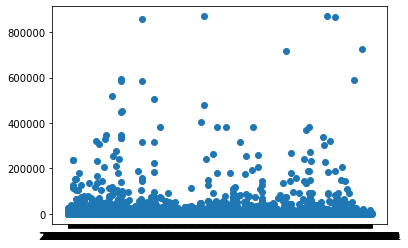

In [101]:
fig, ax = plt.subplots()
plt.scatter(sales['Date'], sales['Sales Total'])
plt.show()

In [24]:
sales.sort_values(by="Sales Total").tail()

,Unnamed: 0,Customer ID,Cohort Yr,Year,Document Number,Date,State,Month,Qty,Unit Price,Sales Total,Revenue,log_sales,purchases
4631,4631,100844,2020,2020,INV19541,2020-11-04,CA,22,372,3899.00,725214.00,725214.00,13.494222,4
3289,3289,100616,2015,2019,INV18472,2019-06-18,CA,18,654,3931.52,857071.36,857071.36,13.661276,42
3205,3205,100609,2015,2018,INV17847,2018-08-27,WA,8,252,3445.00,868140.00,868140.00,13.674108,150
3209,3209,100609,2015,2018,INV18128,2018-12-12,WA,12,252,3451.00,869652.00,852258.96,13.675848,150
3211,3211,100609,2015,2019,INV18160,2019-01-07,WA,1,252,3451.00,869652.00,852258.96,13.675848,150


In [107]:
sales['year_month']=pd.to_datetime(sales['Date']).dt.to_period('M')
monthly = pd.DataFrame(sales.groupby('year_month')['Sales Total'].sum())#.reset_index()
# series.columns = ['year_month', 'Sales']
monthly

,Sales Total
year_month,
2015-01,264673.77
2015-02,321539.27
2015-03,495663.78
2015-04,302575.82
2015-05,203699.51
...,...
2020-08,628568.89
2020-09,1278454.68
2020-10,3401236.09


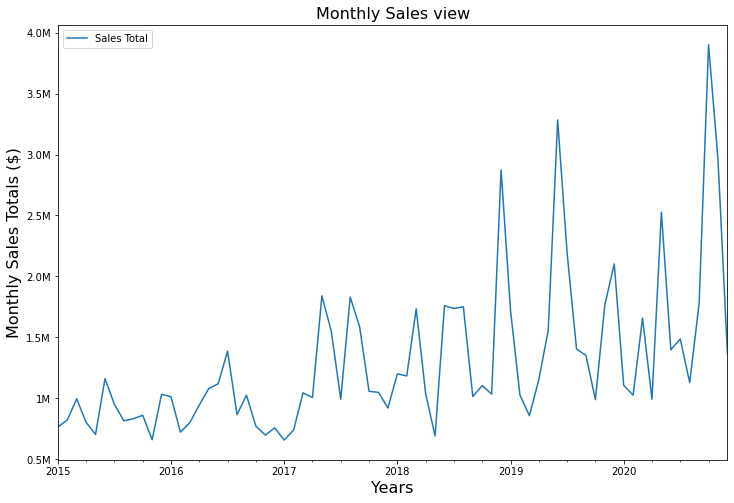

In [197]:
ax = monthly.plot( figsize=(12,8))
yvalues = np.arange(0,4000000,500000)
ylabels = ['0.5M', '1M', '1.5M', '2.0M', '2.5M', '3.0M', '3.5M', '4.0M']
plt.title(label='Monthly Sales view', fontsize=16)
ax.set_xlabel('Years', fontsize=16)
plt.yticks(ticks=yvalues, labels=ylabels)
ax.set_ylabel('Monthly Sales Totals ($)', fontsize=16)
fig = ax.get_figure()
fig.savefig('../images/monthly.png')

In [109]:
sales['quarters']=pd.to_datetime(sales['Date']).dt.to_period('Q')
quarters = pd.DataFrame(sales.groupby('quarters')['Sales Total'].sum())#.reset_index()
# series.columns = ['year_month', 'Sales']
quarters

,Sales Total
quarters,
2015Q1,1081876.82
2015Q2,1166981.13
2015Q3,1097294.78
2015Q4,1054082.44
2016Q1,1036055.71
2016Q2,1643238.90
2016Q3,1778313.23
2016Q4,727237.99
2017Q1,940623.93


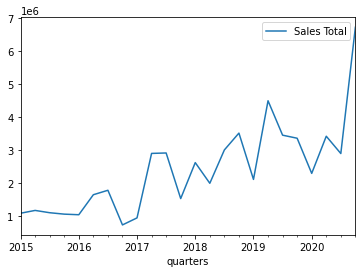

In [111]:
ax = quarters.plot()

In [114]:
df = pd.read_csv('../data/processed/sales.csv')
df

,Unnamed: 0,Customer ID,Cohort Yr,Year,Document Number,Date,State,Month,Qty,Unit Price,Sales Total,Revenue,log_sales,purchases
0,0,100001,2017,2017,INV16230,2017-02-02,WA,2,1,6279.00,6279.00,6279.00,8.744966,1
1,1,100002,2020,2020,INV19281,2020-07-07,CA,28,4,4747.00,4747.00,4747.00,8.465268,1
2,2,100003,2020,2020,INV19416,2020-09-15,CA,9,7,1430.00,10010.00,10010.00,9.211340,1
3,3,100004,2015,2015,INV13168,2015-01-07,WA,1,1,621.75,621.75,621.75,6.432538,6
4,4,100004,2015,2015,INV13220,2015-01-20,WA,2,10,623.25,3116.25,3116.25,8.044386,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5463,5463,101018,2015,2017,INV16990,2017-10-09,NV,30,6,241.00,482.00,482.00,6.177944,11
5464,5464,101018,2015,2017,INV17016,2017-10-11,NV,10,1,335.00,335.00,335.00,5.814131,11
5465,5465,101018,2015,2019,INV18322,2019-03-31,NV,3,1,4199.00,4199.00,4199.00,8.342602,11
5466,5466,101018,2015,2019,INV18337,2019-04-08,NV,8,2,535.00,535.00,535.00,6.282267,11


In [115]:
def retention_matrix_data(df):
    df_cohort = df.groupby(['Cohort Yr', 'Year']).agg(n_customers=('Customer ID', 'nunique')).reset_index(drop=False)
    df_cohort['period_number'] = (df_cohort['Year'] - df_cohort['Cohort Yr'])

    cohort_pivot = df_cohort.pivot_table(index = 'Cohort Yr',
                                        columns = 'period_number',
                                        values = 'n_customers')
    print('Cohort Customer count per year \n',cohort_pivot)
    cohort_size = cohort_pivot.iloc[:,0]
    cohort_size.columns = ['Cohort Yr','unique customers per cohort']
    retention_matrix = cohort_pivot.divide(cohort_size, axis=0)
    print('Customer Retention \n',retention_matrix)
    return retention_matrix

In [118]:
#retention_matrix = retention_matrix_data(df)
retention_matrix_data(df)

Cohort Customer count per year 
 period_number      0      1      2      3      4     5
Cohort Yr                                             
2015           482.0  245.0  174.0  154.0  109.0  83.0
2016           170.0   51.0   38.0   34.0   27.0   NaN
2017           124.0   37.0   23.0   17.0    NaN   NaN
2018            97.0   22.0   14.0    NaN    NaN   NaN
2019            65.0   16.0    NaN    NaN    NaN   NaN
2020            71.0    NaN    NaN    NaN    NaN   NaN
Customer Retention 
 period_number    0         1         2         3         4         5
Cohort Yr                                                           
2015           1.0  0.508299  0.360996  0.319502  0.226141  0.172199
2016           1.0  0.300000  0.223529  0.200000  0.158824       NaN
2017           1.0  0.298387  0.185484  0.137097       NaN       NaN
2018           1.0  0.226804  0.144330       NaN       NaN       NaN
2019           1.0  0.246154       NaN       NaN       NaN       NaN
2020           1.0     

period_number,0,1,2,3,4,5
Cohort Yr,,,,,,
2015,1.0,0.508299,0.360996,0.319502,0.226141,0.172199
2016,1.0,0.300000,0.223529,0.200000,0.158824,NaN
2017,1.0,0.298387,0.185484,0.137097,NaN,NaN
2018,1.0,0.226804,0.144330,NaN,NaN,NaN
2019,1.0,0.246154,NaN,NaN,NaN,NaN
2020,1.0,NaN,NaN,NaN,NaN,NaN


In [200]:
retention_curve = retention_matrix.mean()
retention_curve = pd.DataFrame(retention_curve)
retention_curve = retention_curve.rename({0:'retention'},axis=1)
retention_curve

,retention
period_number,
0,1.000000
1,0.315929
2,0.228585
3,0.218866
4,0.192482
5,0.172199


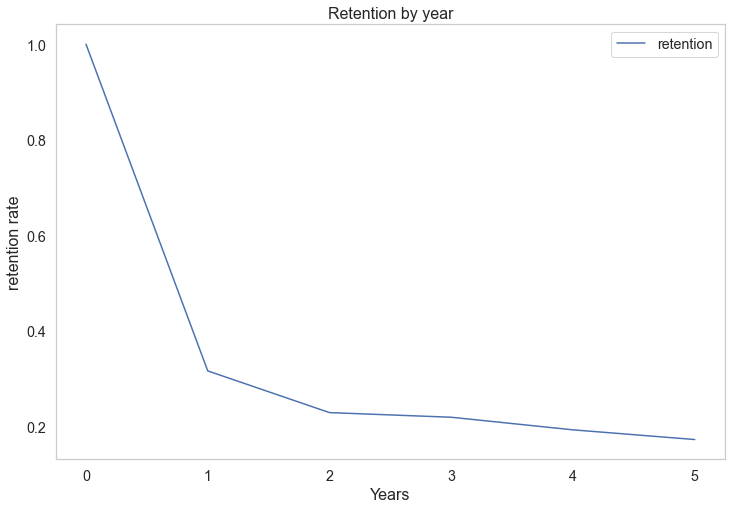

In [288]:
ax = retention_curve.plot( figsize=(12,8))
fig = ax.get_figure()
ax.grid(False)
plt.title('Retention by year', fontsize=16)
ax.set_ylabel('retention rate', fontsize=16)
ax.set_xlabel('Years', fontsize=16)
fig.savefig('../images/retention.png')

In [190]:
retention_curve = pd.DataFrame(retention_curve)
retention_curve.transpose()

period_number,0,1,2,3,4,5
retention,1.0,0.315929,0.228585,0.218866,0.192482,0.172199


In [146]:
churn_matrix = 1-retention_matrix

period_number,0,1,2,3,4,5
Cohort Yr,,,,,,
2015,0.0,0.491701,0.639004,0.680498,0.773859,0.827801
2016,0.0,0.700000,0.776471,0.800000,0.841176,NaN
2017,0.0,0.701613,0.814516,0.862903,NaN,NaN
2018,0.0,0.773196,0.855670,NaN,NaN,NaN
2019,0.0,0.753846,NaN,NaN,NaN,NaN
2020,0.0,NaN,NaN,NaN,NaN,NaN


In [294]:
churn = churn_matrix.mean()
churn = pd.DataFrame(churn)
churn = churn.rename({0:'churn'},axis=1)
churn.transpose()

period_number,0,1,2,3,4,5
churn,0.0,0.684071,0.771415,0.781134,0.807518,0.827801


In [180]:
churn = churn_matrix.mean()
churn

period_number
0    0.000000
1    0.684071
2    0.771415
3    0.781134
4    0.807518
5    0.827801
dtype: float64

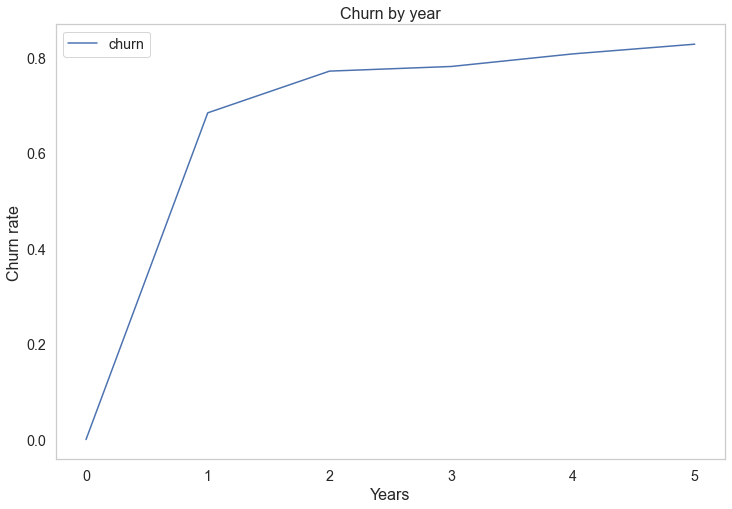

In [295]:
ax = churn.plot( figsize=(12,8))
fig = ax.get_figure()
ax.grid(False)
plt.title('Churn by year', fontsize=16)
ax.set_ylabel('Churn rate', fontsize=16)
ax.set_xlabel('Years', fontsize=16);
fig.savefig('../images/churn.png')

In [222]:
def cohort_size(df):
    cohort_by_customers = pd.DataFrame(df.groupby('Cohort Yr')['Customer ID'].nunique()).reset_index()
    cohort_by_customers.columns = ['Cohort Yr', 'Customer count']
    return cohort_by_customers

In [223]:
def retention_matrix_data(df):
    df_cohort = df.groupby(['Cohort Yr', 'Year']).agg(n_customers=('Customer ID', 'nunique')).reset_index(drop=False)
    df_cohort['period_number'] = (df_cohort['Year'] - df_cohort['Cohort Yr'])

    cohort_pivot = df_cohort.pivot_table(index = 'Cohort Yr',
                                        columns = 'period_number',
                                        values = 'n_customers')
    print('Cohort Customer count per year \n',cohort_pivot)
    cohort_size = cohort_pivot.iloc[:,0]
    cohort_size.columns = ['Cohort Yr','unique customers per cohort']
    retention_matrix = cohort_pivot.divide(cohort_size, axis=0)
    print('Customer Retention \n',retention_matrix)
    return retention_matrix

In [227]:
def retention_matrix_plot(df):
    with sns.axes_style("white"):
        fig, ax = plt.subplots(1,2, figsize=(12,8), sharey=True, gridspec_kw={'width_ratios':[1,11]})

        #retention matrix
        retention_matrix = retention_matrix_data(df)
        sns.heatmap(retention_matrix,
                    mask=retention_matrix.isnull(),
                    annot=True,
                    fmt='.0%',
                    cmap='RdYlGn',
                    ax=ax[1])
        ax[1].set_title('Yearly Cohorts: User Retention', fontsize=16)
        ax[1].set(xlabel='# of periods', ylabel='')

        #cohort size
        cohort_by_customers = cohort_size(df)
        white_cmap = mcolors.ListedColormap(['White'])
        sns.heatmap(cohort_by_customers,
                    annot=True,
                    cbar=False,
                    fmt='g',
                    cmap=white_cmap,
                    ax=ax[0])
        fig.tight_layout()
        plt.show()
    return fig

Cohort Customer count per year 
 period_number      0      1      2      3      4     5
Cohort Yr                                             
2015           482.0  245.0  174.0  154.0  109.0  83.0
2016           170.0   51.0   38.0   34.0   27.0   NaN
2017           124.0   37.0   23.0   17.0    NaN   NaN
2018            97.0   22.0   14.0    NaN    NaN   NaN
2019            65.0   16.0    NaN    NaN    NaN   NaN
2020            71.0    NaN    NaN    NaN    NaN   NaN
Customer Retention 
 period_number    0         1         2         3         4         5
Cohort Yr                                                           
2015           1.0  0.508299  0.360996  0.319502  0.226141  0.172199
2016           1.0  0.300000  0.223529  0.200000  0.158824       NaN
2017           1.0  0.298387  0.185484  0.137097       NaN       NaN
2018           1.0  0.226804  0.144330       NaN       NaN       NaN
2019           1.0  0.246154       NaN       NaN       NaN       NaN
2020           1.0     

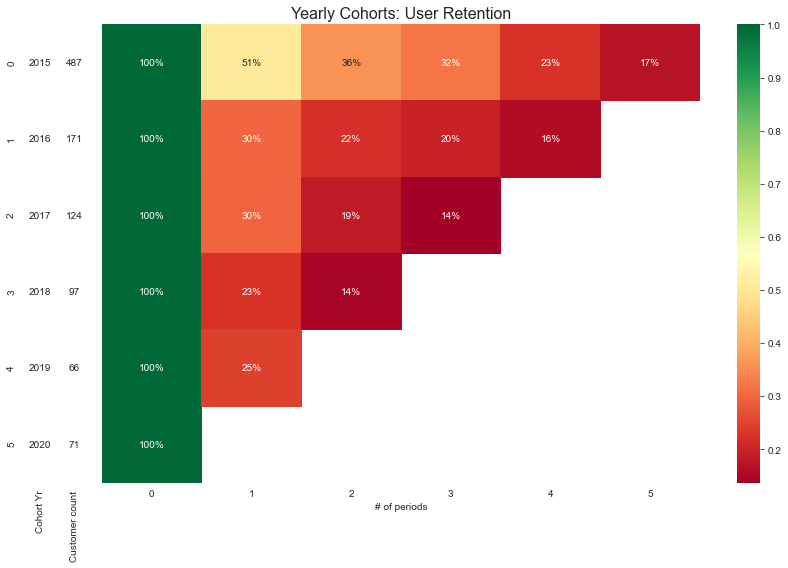

In [229]:
retention_fig = retention_matrix_plot(df)

In [242]:
def churn_matrix_data(df):
    df_cohort = df.groupby(['Cohort Yr', 'Year']).agg(n_customers=('Customer ID', 'nunique')).reset_index(drop=False)
    df_cohort['period_number'] = (df_cohort['Year'] - df_cohort['Cohort Yr'])

    cohort_pivot = df_cohort.pivot_table(index = 'Cohort Yr',
                                        columns = 'period_number',
                                        values = 'n_customers')
    print('Cohort Customer count per year \n',cohort_pivot)
    cohort_size = cohort_pivot.iloc[:,0]
    cohort_size.columns = ['Cohort Yr','unique customers per cohort']
    retention_matrix = cohort_pivot.divide(cohort_size, axis=0)
    churn_matrix = 1-retention_matrix
    print('Customer Churn \n',churn_matrix)
    return churn_matrix

In [244]:
churn_matrix = churn_matrix_data(df)

Cohort Customer count per year 
 period_number      0      1      2      3      4     5
Cohort Yr                                             
2015           482.0  245.0  174.0  154.0  109.0  83.0
2016           170.0   51.0   38.0   34.0   27.0   NaN
2017           124.0   37.0   23.0   17.0    NaN   NaN
2018            97.0   22.0   14.0    NaN    NaN   NaN
2019            65.0   16.0    NaN    NaN    NaN   NaN
2020            71.0    NaN    NaN    NaN    NaN   NaN
Customer Churn 
 period_number    0         1         2         3         4         5
Cohort Yr                                                           
2015           0.0  0.491701  0.639004  0.680498  0.773859  0.827801
2016           0.0  0.700000  0.776471  0.800000  0.841176       NaN
2017           0.0  0.701613  0.814516  0.862903       NaN       NaN
2018           0.0  0.773196  0.855670       NaN       NaN       NaN
2019           0.0  0.753846       NaN       NaN       NaN       NaN
2020           0.0       Na

In [296]:
def churn_matrix_plot(df):
    sns.set(font_scale=1.2)
    with sns.axes_style("white"):
        fig, ax = plt.subplots(1,2, figsize=(12,8), sharey=True, gridspec_kw={'width_ratios':[1,11]})

        #churn matrix
        churn_matrix = churn_matrix_data(df)
        sns.heatmap(churn_matrix,
                    mask=churn_matrix.isnull(),
                    annot=True,
                    fmt='.0%',
                    cmap='OrRd',
                    ax=ax[1])
        ax[1].set_title('Yearly Cohorts: User Churn', fontsize=16)
        ax[1].set(xlabel='# of periods', ylabel='')

        #cohort size
        cohort_by_customers = cohort_size(df)
        white_cmap = mcolors.ListedColormap(['White'])
        sns.heatmap(cohort_by_customers,
                    annot=True,
                    cbar=False,
                    fmt='g',
                    cmap=white_cmap,
                    ax=ax[0])
        fig.tight_layout()
        plt.show()
    return fig

Cohort Customer count per year 
 period_number      0      1      2      3      4     5
Cohort Yr                                             
2015           482.0  245.0  174.0  154.0  109.0  83.0
2016           170.0   51.0   38.0   34.0   27.0   NaN
2017           124.0   37.0   23.0   17.0    NaN   NaN
2018            97.0   22.0   14.0    NaN    NaN   NaN
2019            65.0   16.0    NaN    NaN    NaN   NaN
2020            71.0    NaN    NaN    NaN    NaN   NaN
Customer Churn 
 period_number    0         1         2         3         4         5
Cohort Yr                                                           
2015           0.0  0.491701  0.639004  0.680498  0.773859  0.827801
2016           0.0  0.700000  0.776471  0.800000  0.841176       NaN
2017           0.0  0.701613  0.814516  0.862903       NaN       NaN
2018           0.0  0.773196  0.855670       NaN       NaN       NaN
2019           0.0  0.753846       NaN       NaN       NaN       NaN
2020           0.0       Na

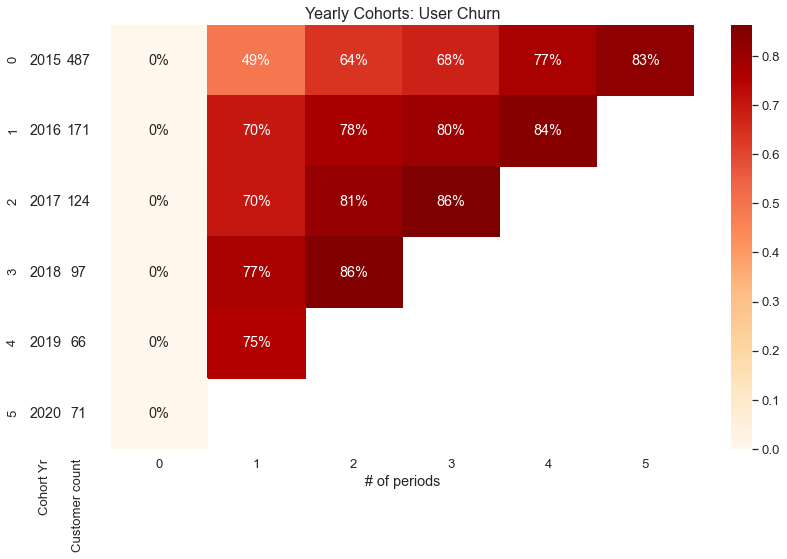

In [297]:
churn_cohort_plot = churn_matrix_plot(df)

In [280]:
churn_cohort_plot.savefig('../images/cohort_churn.png')

In [338]:
annual_sales = df.groupby('Year')['Sales Total'].sum()
annual_sales

Year
2015     4400235.17
2016     5184845.83
2017     8273626.25
2018    11123211.70
2019    13409299.98
2020    15326550.78
Name: Sales Total, dtype: float64

In [299]:
def cohort_size(df):
    cohort_by_customers = pd.DataFrame(df.groupby('Cohort Yr')['Customer ID'].nunique()).reset_index()
    cohort_by_customers.columns = ['Cohort Yr', 'Customer count']
    return cohort_by_customers

In [301]:
cohort_by_customers = cohort_size(df)
cohort_by_customers

,Cohort Yr,Customer count
0,2015,487
1,2016,171
2,2017,124
3,2018,97
4,2019,66
5,2020,71


In [302]:
def cohort_sales_by_year(df):
    sales_yr_cohort = pd.DataFrame(df.groupby(['Year','Cohort Yr'])['Sales Total'].sum()).reset_index()
    return sales_yr_cohort

In [305]:
sales_yr_cohort = cohort_sales_by_year(df)


In [306]:
def customer_cohort_data(df):
    sales_yr_cohort = cohort_sales_by_year(df)
    sales_yr_cohort = sales_yr_cohort.reset_index()
    sales_yr_cohort = sales_yr_cohort.rename({'Cohort Yr':'Cohort Yr Sales'},axis=1)
    sales_cohort_data = pd.pivot_table(sales_yr_cohort, index='Cohort Yr Sales', values='Sales Total', columns='Year', fill_value=0)
    return sales_cohort_data 

In [307]:
sales_cohort_data = customer_cohort_data(df)

In [368]:
def customer_cohort_chart(df):
    annual_sales = df.groupby('Year')['Sales Total'].sum()
    sales_cohort_data = customer_cohort_data(df)
    years = sales_cohort_data.columns.to_list()
    y={}
    for yr in sales_cohort_data.index.to_list():
        y[yr] =sales_cohort_data.loc[yr].to_list()
    
    fig, ax = plt.subplots(figsize=(12,10))
    x = years
    ax.plot(annual_sales, color='blue',linewidth=2)
    ax.stackplot(years, y.values(), labels=y.keys())
    ax.legend(loc='upper left', fontsize=16)
    ax.set_title('Annual Sales by Customer Cohort Year', fontsize=16)
    ax.set_xlabel('Years', fontsize=16)
    ax.set_ylabel('Sales ($)',fontsize=16)
    plt.yticks(np.arange(0, 15000000, 2000000), labels=['0','2m', '4m', '6m', '8m', '10m', '12m', '14m'], fontsize=16)
    plt.xticks(fontsize=16)
    plt.savefig('../images/c3.png')
    plt.show()
    return plt

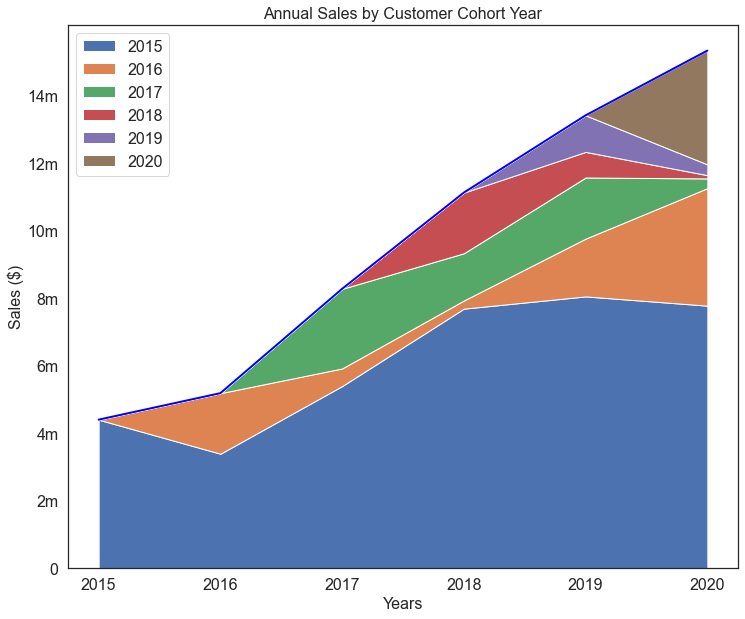

In [369]:
c3 = customer_cohort_chart(df)


# C3 Prediction

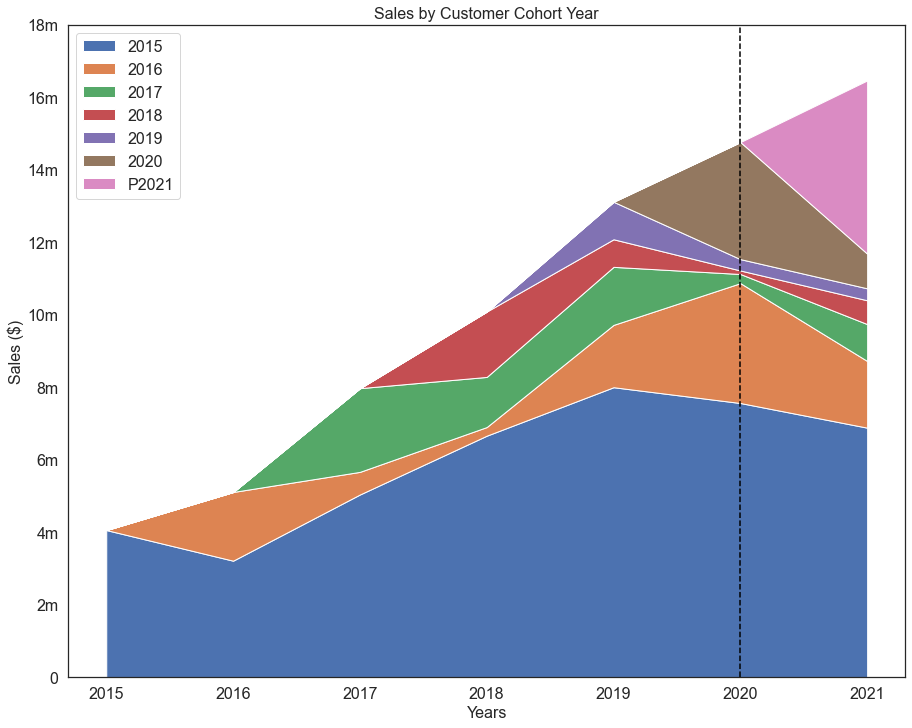

In [385]:
fig, ax = plt.subplots(figsize=(15,12))

x = [2015, 2016, 2017, 2018, 2019, 2020, 2021]
y1 = [4063691, 3217517, 5043956, 6666479, 8004339,      7568438,  6888260]# 2015 
y2 = [0, 1895755,  624522, 238405,        1719569,      3307532,  1840535]# 2016
y3 = [0,       0, 2309794, 1383481,       1601613,       252210,  1017969]# 2017
y4 = [0,       0,       0, 1803995,        761195,        97294,   656414]# 2018
y5 = [0,       0,       0,       0,       1034582,       313471,   329962]# 2019
y6 = [0,       0,       0,       0,             0,      3230235,   957125]# 2020
y7 = [0,       0,       0,       0,             0,            0,  4779200]# 2021


ax.stackplot(x, y1, y2,y3, y4, y5, y6, y7,
             labels = ['2015', '2016', '2017', '2018', '2019', '2020', 'P2021'])
ax.legend(loc='upper left', fontsize=16)
ax.set_title('Sales by Customer Cohort Year', fontsize=16)
ax.set_xlabel('Years', fontsize=16)
ax.set_ylabel('Sales ($)',fontsize=16)
plt.yticks(np.arange(0, 20000000, 2000000), labels=['0','2m', '4m', '6m', '8m', '10m', '12m', '14m', '16m','18m'], fontsize=16)
plt.xticks(fontsize=16,)
plt.axvline(x=2020,ls = '--',color='black')
plt.savefig('../images/c3_prediction.png') 
plt.show()

In [382]:
plt.savefig('..data/processed/c3_prediction.png')

FileNotFoundError: [Errno 2] No such file or directory: '..data/processed/c3_prediction.png'

<Figure size 432x288 with 0 Axes>

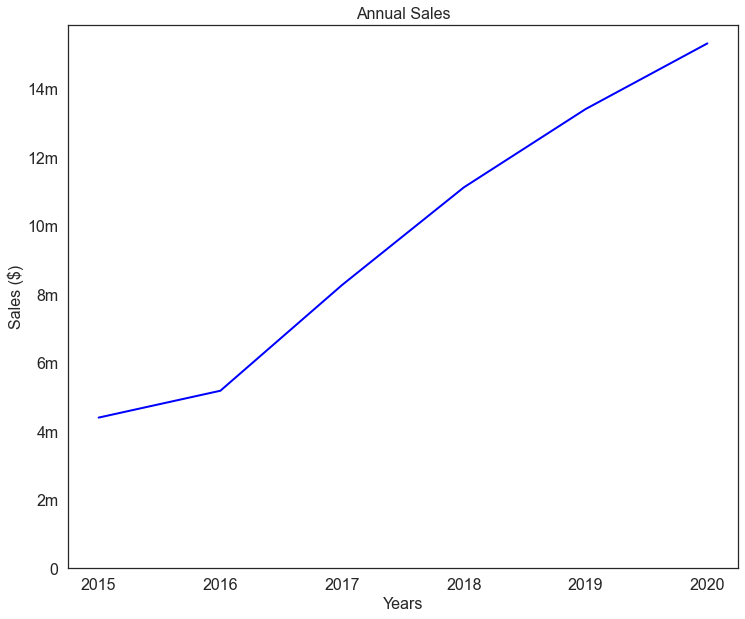

In [365]:
fig, ax = plt.subplots(figsize=(12,10))
ax.plot(annual_sales, color='blue',linewidth=2)
ax.set_xlabel('Years', fontsize=16)
ax.set_ylabel('Sales ($)',fontsize=16)
ax.set_title('Annual Sales', fontsize=16)
plt.yticks(np.arange(0, 15000000, 2000000), labels=['0','2m', '4m', '6m', '8m', '10m', '12m', '14m'], fontsize=16)
plt.xticks(fontsize=16)
# plt.show()
plt.savefig('../images/annual_sales.png')